In [1]:
import plotly
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import pickle


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import pickle

import nltk
from nltk.corpus import stopwords
import re

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
with open('FINAL_KP_TWEETS_WITH_TOPICS_SENTIMENTS.pickle', "rb") as f:
    tweets = pickle.load(f)

In [7]:
#Set tweets without a topic assigned to "None"
tweets.loc[tweets["topic_name"].isnull(), 'topic_name'] = "None"

In [8]:
#Lower-case all topic names
tweets["topic_name"] = tweets["topic_name"].apply(lambda x: x.lower())

In [10]:
#Create a topics dataframe and remove "none" tweets
topics = tweets[["index", "topic_name"]]
topics = topics[topics["topic_name"] != "none"]

In [ ]:
#For each topic create a dataframe with a count column and resample the count to a monthly basis

In [13]:
sports = topics[topics["topic_name"]=="sports"]
sports["sports"] = 1
sports = sports.set_index("index")
sports = sports.resample("M").sum()

In [14]:
ir = topics[topics["topic_name"]=="international relations"]
ir["international relations"] = 1
ir = ir.set_index("index")
ir = ir.resample("M").sum()

In [15]:
holiday = topics[topics["topic_name"]=="holiday greetings"]
holiday["holiday greetings"] = 1
holiday = holiday.set_index("index")
holiday = holiday.resample("M").sum()

In [17]:
sh = topics[topics["topic_name"]=="inspirational quotes"]
sh["inspirational quotes"] = 1
sh = sh.set_index("index")
sh = sh.resample("M").sum()

In [18]:
follow = topics[topics["topic_name"]=="follow"]
follow["follow requests"] = 1
follow = follow.set_index("index")
follow = follow.resample("M").sum()

In [19]:
debate = topics[topics["topic_name"]=="political debate"]
debate["political debate"] = 1
debate = debate.set_index("index")
debate = debate.resample("M").sum()

In [20]:
gender = topics[topics["topic_name"]=="family and gender issues"]
gender["family and gender issues"] = 1
gender = gender.set_index("index")
gender = gender.resample("M").sum()

In [21]:
school = topics[topics["topic_name"]=="municipal issues"]
school["municipal issues"] = 1
school = school.set_index("index")
school = school.resample("M").sum()

In [22]:
religion = topics[topics["topic_name"]=="religion"]
religion["religion"] = 1
religion = religion.set_index("index")
religion = religion.resample("M").sum()

In [23]:
party = topics[topics["topic_name"]=="party politics"]
party["party politics"] = 1
party = party.set_index("index")
party = party.resample("M").sum()

In [24]:
nawaz = topics[topics["topic_name"]=="supreme court nawaz sharif"]
nawaz["supreme court and nawaz sharif"] = 1
nawaz = nawaz.set_index("index")
nawaz = nawaz.resample("M").sum()

In [25]:
selling = topics[topics["topic_name"]=="selling things"]
selling["selling things"] = 1
selling = selling.set_index("index")
selling = selling.resample("M").sum()

In [26]:
violent = topics[topics["topic_name"]=="violent conflict"]
violent["violent conflict"] = 1
violent = violent.set_index("index")
violent = violent.resample("M").sum()

In [27]:
media = topics[topics["topic_name"]=="sharing media"]
media["sharing media"] = 1
media = media.set_index("index")
media = media.resample("M").sum()

In [28]:
pushto = topics[topics["topic_name"]=="pushto poetry and sayings"]
pushto["pushto poetry and sayings"] = 1
pushto = pushto.set_index("index")
pushto = pushto.resample("M").sum()

In [29]:
corruption = topics[topics["topic_name"]=="public works and corruption"]
corruption["corruption"] = 1
corruption = corruption.set_index("index")
corruption = corruption.resample("M").sum()

In [30]:
india = topics[topics["topic_name"]=="india conflict"]
india["india conflict"] = 1
india = india.set_index("index")
india = india.resample("M").sum()

In [31]:
economy = topics[topics["topic_name"]=="economy"]
economy["economy"] = 1
economy = economy.set_index("index")
economy = economy.resample("M").sum()

In [32]:
#Merge all of the topic dataframes

one = economy.merge(gender, left_index=True, right_index=True)
two = holiday.merge(follow, left_index=True, right_index=True)
three = ir.merge(school, left_index=True, right_index=True)
four = party.merge(debate, left_index=True, right_index=True)
five = pushto.merge(religion, left_index=True, right_index=True)
six = sh.merge(selling, left_index=True, right_index=True)
seven = media.merge(sports, left_index=True, right_index=True)
eight = nawaz.merge(violent, left_index=True, right_index=True)
nine = corruption.merge(india, left_index=True, right_index=True)

a = one.merge(two, left_index=True, right_index=True)
b = three.merge(four, left_index=True, right_index=True)
c = five.merge(six, left_index=True, right_index=True)
d = seven.merge(eight, left_index=True, right_index=True)
e = nine

pinecone = a.merge(b, left_index=True, right_index=True)
sadie = c.merge(d, left_index=True, right_index=True)
bone = e

almost_data = pinecone.merge(sadie, left_index=True, right_index=True)
data = almost_data.merge(bone, left_index=True, right_index=True)

In [38]:
#Calculate the total counts for the data
data['sum'] = data.sum(axis=1)

In [193]:
#Calculate the percent of each topic over time
data["economy percent"] = (data["economy"]/data["sum"]) * 100
data["family and gender percent"] = (data["family and gender issues"]/data["sum"]) * 100
data["holiday greetings percent"] = (data["holiday greetings"]/data["sum"]) * 100
data["follow requests percent"] = (data["follow requests"]/data["sum"]) * 100
data["international relations percent"] = (data["international relations"]/data["sum"]) * 100
data["municipal issues percent"] = (data["municipal issues"]/data["sum"]) * 100
data["party politics percent"] = (data["party politics in kp"]/data["sum"]) * 100
data["political debate percent"] = (data["political debate"]/data["sum"]) * 100
data["pushto sayings percent"] = (data["pushto poetry and sayings"]/data["sum"]) * 100
data["religion percent"] = (data["religion"]/data["sum"]) * 100
data["inspirational quotes percent"] = (data["self-help quotes"]/data["sum"]) * 100
data["selling things percent"] = (data["selling things"]/data["sum"]) * 100
data["sharing media percent"] = (data["sharing media"]/data["sum"]) * 100
data["sports percent"] = (data["sports"]/data["sum"]) * 100
data["nawaz sharif court percent"] = (data["supreme court and nawaz sharif"]/data["sum"]) * 100
data["violent conflict percent"] = (data["violent conflict in kp"]/data["sum"]) * 100
data["corruption percent"] = (data["corruption"]/data["sum"]) * 100
data["india conflict percent"] = (data["india conflict"]/data["sum"]) * 100

In [195]:
#Create dataframe with only percent data
percent = data[["economy percent", "family and gender percent", "holiday greetings percent", "follow requests percent", "international relations percent", "schools and infrastructure percent", "party politics percent", "political debate percent", "pushto sayings percent", "religion percent", "self-help quotes percent", "selling things percent", "sharing media percent", "sports percent", "nawaz sharif court percent", "violent conflict percent", "corruption percent", "india conflict percent"]]

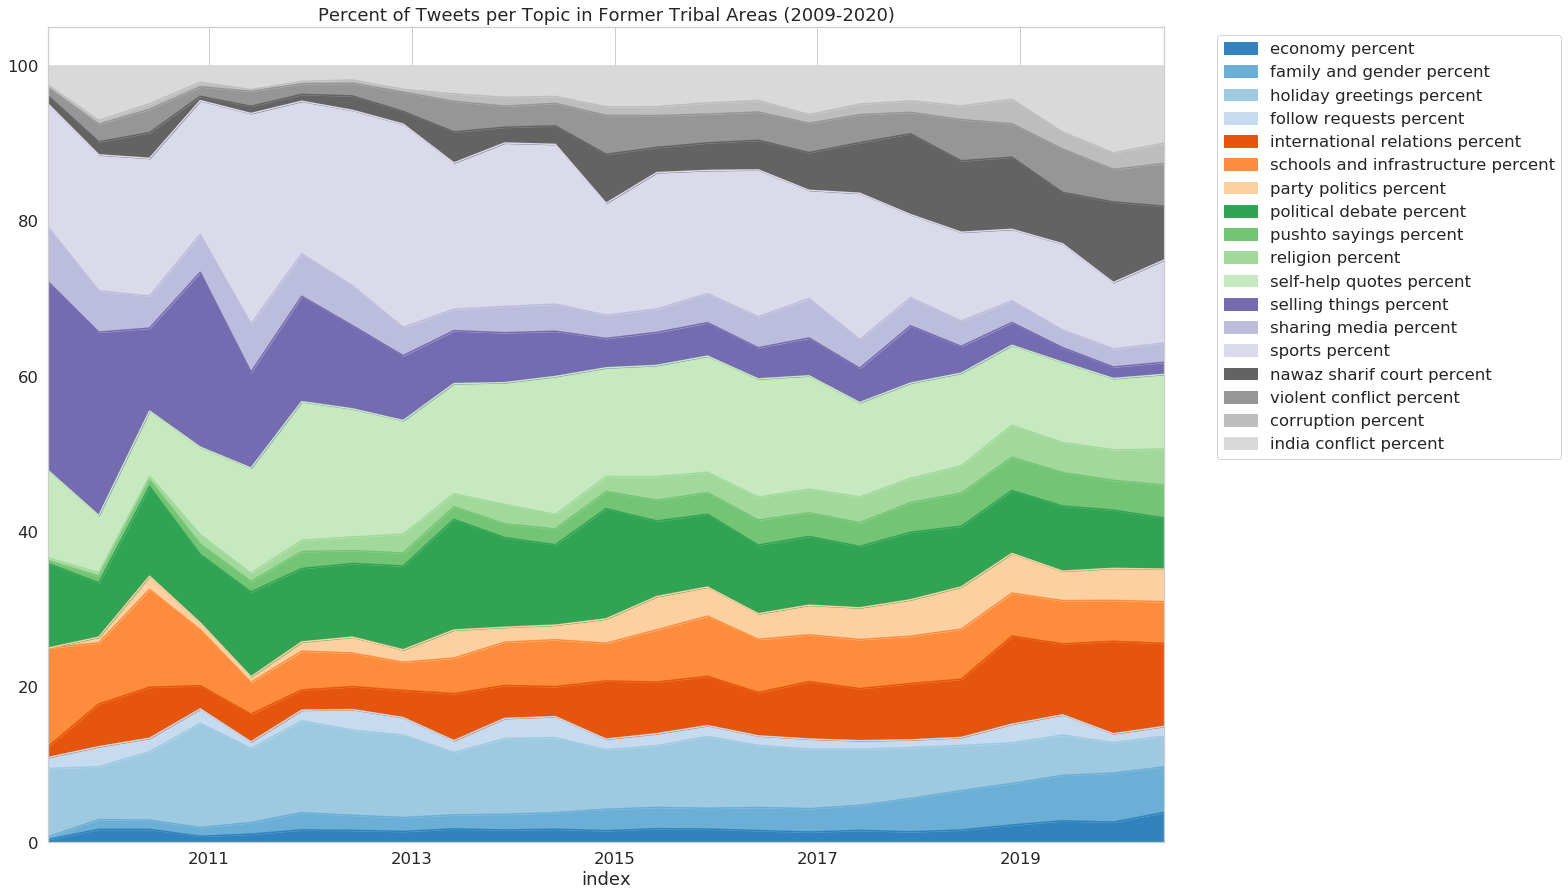

In [197]:
#Plot topic percents over time
plt.get_cmap(name="tab20c", lut=None)

percent.plot.area(figsize = [20,15], title="Percent of Tweets per Topic in Former Tribal Areas (2009-2020)", colormap="tab20c", legend="reverse")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig("Percent of Tweets per Topic in Former Tribal Areas (2009-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)

In [ ]:
#Combine similar categories to a smaller set of dataframes in order to generate a simplified plot

In [199]:
percent["economy and infrastructure"] = percent[["economy percent", "schools and infrastructure percent", "corruption percent"]].sum(axis=1)

In [212]:
percent["interpersonal messages"] = percent[["holiday greetings percent", "follow requests percent", "pushto sayings percent", "self-help quotes percent", "sharing media percent"]].sum(axis=1)

In [204]:
percent["domestic politics"] = percent[["party politics percent", "political debate percent", "nawaz sharif court percent"]].sum(axis=1)

In [205]:
percent["international politics"] = percent[["international relations percent", "india conflict percent"]].sum(axis=1)

In [207]:
percent["family and gender"] = percent["family and gender percent"]

In [208]:
percent["violent conflict"] = percent["violent conflict percent"]

In [209]:
percent["selling things"] = percent["selling things percent"]

In [211]:
percent["sports"] = percent["sports percent"]

In [213]:
percent["religion"] = percent["religion percent"]

In [214]:
#Create a new simplified percentage dataframe
new_percent = percent[["family and gender", "international politics", "domestic politics", "interpersonal messages", "economy and infrastructure", "violent conflict", "selling things", "sports", "religion"]]

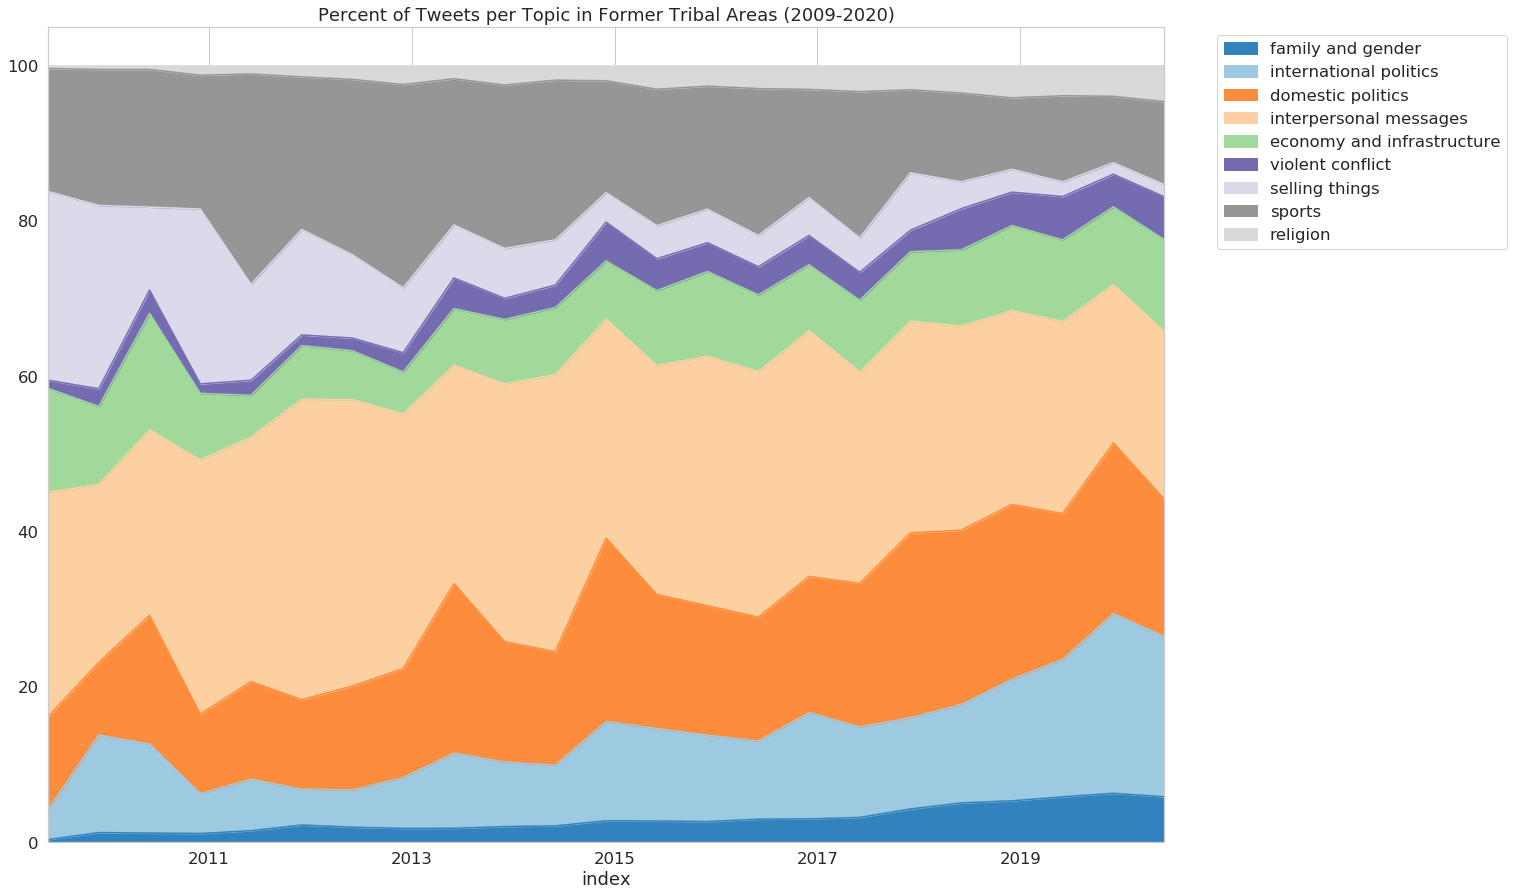

In [217]:
#Plot simplified topics over time
new_percent.plot.area(figsize = [20,15], title="Percent of Tweets per Topic in Former Tribal Areas (2009-2020)", colormap="tab20c", legend="reverse")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig("Percent of Tweets per Topic in Former Tribal Areas (Nine Topics) (2009-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)